In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from datetime import datetime, timedelta
from pprint import pprint
import requests

from scoreboard import Scoreboard
from nba_util import _api_scrape
from nba_util import get_all_player_ids

In [2]:
import pandas as pd
from IPython.core.display import display

# shortcuts:
shift+Enter -> run cell + skip to next cell  
ctrl+Enter -> run cell (no skip)

# List

In [3]:
# list definition:
list_name = [12, 23, 's', 'Egozi', 3.14]

צור רשימה עם 10 איברים

In [4]:
# code here:

f=[3,6,9,12,15,18,21,24,27,30]
f[5],f[4]

(18, 15)

In [5]:
for x in range (9)

SyntaxError: invalid syntax (<ipython-input-5-ccbdd966366c>, line 1)


מהרשימה שיצרת ,צור רשימה חדשה שמכילה כל איבר שני מהרשימה הראשונה:

In [6]:
r=[f[0],f[2],f[4],f[6],f[8]]
print r

[3, 9, 15, 21, 27]


In [7]:
a

NameError: name 'a' is not defined

In [8]:
# code here
a[0,2,4,6,8]

NameError: name 'a' is not defined

צור רשימה שלישית שמכילה כל איבר שלישי מהרשימה הראשונה, מסודרים מהסוף להתחלה

In [9]:
# code here
g=[f[9],f[6],f[3],f[0]]
print g

[30, 21, 12, 3]


# Dictionary

*Unordered* list of key:value pairs  
if d is a dictionary:  
d.keys() -> list of all keys  
d.values() -> list of all values

In [10]:
# dict definition:
dict_name = {'Sunday': 1, 'Monday': 2, 'July': 26, 'Arbel': 98, 'Banan':14}

In [11]:
dict_name

{'Arbel': 98, 'Banan': 14, 'July': 26, 'Monday': 2, 'Sunday': 1}

צור מילון עם חמישה איברים

In [12]:
# code here:
nu = {'Brayent': 24,'Jorden': 23,'Curry': 30,'Duncic': 77,'egoziII': 18}
print nu

{'Jorden': 23, 'egoziII': 18, 'Brayent': 24, 'Curry': 30, 'Duncic': 77}


In [13]:
w=nu.keys()
print w

['Jorden', 'egoziII', 'Brayent', 'Curry', 'Duncic']


In [14]:
h=nu.values()
print h

[23, 18, 24, 30, 77]


In [15]:
print {w[2]:h[2],w[3],h[3],w[4],h[4],w[1],h[1],w[0],h[0]

SyntaxError: invalid syntax (<ipython-input-15-46b5bb766793>, line 1)

In [16]:
print w

['Jorden', 'egoziII', 'Brayent', 'Curry', 'Duncic']


הדפס את המילון על פי סדר האלף בית של המפתחות:

In [17]:
print nu[w[0]]
print nu[w[2]]

23
24


In [18]:
# code here (use print())
keys()

NameError: name 'keys' is not defined

# NBA 

In [19]:
from datetime import date
import datetime

d0 = date(2019, 1, 15)
d1 = date(2018, 10, 16)
delta = d1 - d0
print delta.days

-91


In [20]:
today = date.today()
delta = datetime.timedelta(days=71)
new_date = today - delta
print new_date

2018-11-05


In [27]:
sb = Scoreboard(offset=-len())
print sb

TypeError: len() takes exactly one argument (0 given)

מה הפעולות של האובייקט?    
איזה אינפורמציה מכיל האובייקט?

In [22]:
scores = sb.line_score()

NameError: name 'sb' is not defined

In [23]:
L = range(5)
for i in L:
    print i

0
1
2
3
4


In [24]:
range(5)

[0, 1, 2, 3, 4]

In [25]:
# for i in range(len(scores)):
#     print scores[i]['TEAM_CITY_NAME'], scores[i]['TEAM_ABBREVIATION'], scores[i]['TEAM_WINS_LOSSES']

score_table = {}
for score in scores:
    score_table.append(score['TEAM_CITY_NAME'], score['TEAM_ABBREVIATION'])
    
display(pd.DataFrame(score_table))

NameError: name 'scores' is not defined

  מה מכיל 
scores  
?  
איך הוא מסודר?

In [26]:
GamesToday=[]
for i in range(0,len(scores),2):
    if scores[i]['PTS_OT1']==0:
        game = {scores[i]['TEAM_CITY_NAME']: [scores[i]['PTS'], scores[i]['PTS_QTR1'], scores[i]['PTS_QTR2'], scores[i]['PTS_QTR3'], scores[i]['PTS_QTR4']],
                scores[i+1]['TEAM_CITY_NAME']: [scores[i+1]['PTS'], scores[i+1]['PTS_QTR1'], scores[i+1]['PTS_QTR2'], scores[i+1]['PTS_QTR3'], scores[i+1]['PTS_QTR4']]}
        GamesToday.append(game)
        display(pd.DataFrame.from_dict(game, orient='index', columns=['PTS','QTR1','QTR2','QTR3','QTR4']))
    else:
        if scores[i]['PTS_OT2']==0:
            game = {scores[i]['TEAM_CITY_NAME']: [scores[i]['PTS'], scores[i]['PTS_QTR1'], scores[i]['PTS_QTR2'], scores[i]['PTS_QTR3'], scores[i]['PTS_QTR4'], scores[i]['PTS_OT1']],
                    scores[i+1]['TEAM_CITY_NAME']: [scores[i+1]['PTS'], scores[i+1]['PTS_QTR1'], scores[i+1]['PTS_QTR2'], scores[i+1]['PTS_QTR3'], scores[i+1]['PTS_QTR4'], scores[i+1]['PTS_OT1']]}
            GamesToday.append(game)
            display(pd.DataFrame.from_dict(game, orient='index', columns=['PTS','QTR1','QTR2','QTR3','QTR4','OT1']))
        else:
            if scores[i]['PTS_OT3']==0:
                game = {scores[i]['TEAM_CITY_NAME']: [scores[i]['PTS'], scores[i]['PTS_QTR1'], scores[i]['PTS_QTR2'], scores[i]['PTS_QTR3'], scores[i]['PTS_QTR4'], scores[i]['PTS_OT1'], scores[i]['PTS_OT2']],
                        scores[i+1]['TEAM_CITY_NAME']: [scores[i+1]['PTS'], scores[i+1]['PTS_QTR1'], scores[i+1]['PTS_QTR2'], scores[i+1]['PTS_QTR3'], scores[i+1]['PTS_QTR4'], scores[i+1]['PTS_OT1'], scores[i+1]['PTS_OT2']]}
                GamesToday.append(game)
                display(pd.DataFrame.from_dict(game, orient='index', columns=['PTS','QTR1','QTR2','QTR3','QTR4','OT1','OT2']))
            else:
                game = {scores[i]['TEAM_CITY_NAME']: [scores[i]['PTS'], scores[i]['PTS_QTR1'], scores[i]['PTS_QTR2'], scores[i]['PTS_QTR3'], scores[i]['PTS_QTR4'], scores[i]['PTS_OT1'], scores[i]['PTS_OT2'], scores[i]['PTS_OT3']],
                        scores[i+1]['TEAM_CITY_NAME']: [scores[i+1]['PTS'], scores[i+1]['PTS_QTR1'], scores[i+1]['PTS_QTR2'], scores[i+1]['PTS_QTR3'], scores[i+1]['PTS_QTR4'], scores[i+1]['PTS_OT1'], scores[i+1]['PTS_OT2'], scores[i]['PTS_OT3']]}
                GamesToday.append(game)
                display(pd.DataFrame.from_dict(game, orient='index', columns=['PTS','QTR1','QTR2','QTR3','QTR4','OT1','OT2','OT3']))
    

NameError: name 'scores' is not defined

# משימה:  
המטרה לייצר מהנתונים רשימה של התוצאות של המשחקים מתוך  
scores.  
הרשימה צריכה להכיל מילון לכל משחק מהצורה:  
[..., {team1: score1, team2: score2}, ...]


In [124]:
# code here

# For and if

In [127]:
# and, or, not
if a > 10 and a < 15:
    print 'a is between 10 and 15'

In [192]:
for i in range(0,len(scores),2):
    t1g1=scores[i]['PTS']
    t2g1=scores[i+1]['PTS']

    if t1g1>t2g1:
        print scores[i]['TEAM_CITY_NAME'] + ' win '  +  scores[i+1]['TEAM_CITY_NAME']  +  ' lose '
    else:
        print scores[i+1]['TEAM_CITY_NAME'] + ' win ' + scores[i]['TEAM_CITY_NAME']  +  ' lose '
 

Detroit win New York lose 
Atlanta win Miami lose 
Toronto win Memphis lose 
Denver win Los Angeles lose 
Indiana win Phoenix lose 


In [ ]:
NBA_all_games = {}
for offset in range(90):
    sb = Scoreboard(offset=-offset)
    scores = sb.line_score()
    
    for i in range(0,len(scores),2):
        team1=[scores[i]['TEAM_CITY_NAME'],scores[i]['PTS']]
        team2=[scores[i+1]['TEAM_CITY_NAME'],scores[i+1]['PTS']]


        if scores[i]['TEAM_CITY_NAME'] in NBA_all_games.keys():
            NBA_all_games[scores[i]['TEAM_CITY_NAME']].append([scores[i]['PTS'],scores[i+1]['PTS']])
        else: 
            NBA_all_games[scores[i]['TEAM_CITY_NAME']]=[[scores[i]['PTS'],scores[i+1]['PTS']]]


        if scores[i+1]['TEAM_CITY_NAME'] in NBA_all_games.keys():
            NBA_all_games[scores[i+1]['TEAM_CITY_NAME']].append([scores[i+1]['PTS'],scores[i]['PTS']])
        else: 
            NBA_all_games[scores[i+1]['TEAM_CITY_NAME']]=[[scores[i+1]['PTS'],scores[i]['PTS']]]



In [ ]:
print NBA_all_games

In [243]:
print scores[0]

{u'TEAM_CITY_NAME': u'Oklahoma City', u'GAME_DATE_EST': u'2018-11-07T00:00:00', u'PTS_OT10': 0, u'TEAM_ID': 1610612760, u'REB': 44, u'TEAM_WINS_LOSSES': u'6-4', u'GAME_SEQUENCE': 1, u'TEAM_ABBREVIATION': u'OKC', u'PTS_OT8': 0, u'PTS_OT9': 0, u'PTS_OT2': 0, u'PTS_OT3': 0, u'PTS_OT1': 0, u'PTS': 95, u'PTS_OT7': 0, u'PTS_OT4': 0, u'PTS_OT5': 0, u'TOV': 12, u'GAME_ID': u'0021800153', u'FT_PCT': 0.692, u'PTS_OT6': 0, u'FG_PCT': 0.417, u'AST': 10, u'FG3_PCT': 0.259, u'PTS_QTR3': 23, u'PTS_QTR2': 25, u'PTS_QTR1': 23, u'PTS_QTR4': 24}


In [247]:
score_table

[[u'Oklahoma City', u'OKC', u'6-4'],
 [u'Cleveland', u'CLE', u'1-10'],
 [u'Detroit', u'DET', u'5-5'],
 [u'Orlando', u'ORL', u'4-7'],
 [u'New York', u'NYK', u'4-8'],
 [u'Atlanta', u'ATL', u'3-8'],
 [u'San Antonio', u'SAS', u'6-4'],
 [u'Miami', u'MIA', u'5-5'],
 [u'Philadelphia', u'PHI', u'7-5'],
 [u'Indiana', u'IND', u'7-5'],
 [u'Denver', u'DEN', u'9-2'],
 [u'Memphis', u'MEM', u'6-4'],
 [u'Chicago', u'CHI', u'3-9'],
 [u'New Orleans', u'NOP', u'5-6'],
 [u'Dallas', u'DAL', u'3-8'],
 [u'Utah', u'UTA', u'5-6'],
 [u'Toronto', u'TOR', u'11-1'],
 [u'Sacramento', u'SAC', u'6-5'],
 [u'Minnesota', u'MIN', u'4-8'],
 [u'Los Angeles', u'LAL', u'5-6']]

In [15]:
NBA_team = NBA_all_games.keys()
standing_table = {}

for team in NBA_all_games.keys(): 
    
    standing_table[team]  = {'G': 0, 'W': 0, 'L':0, 'pts+':0, 'pts-':0, 'W_%':0}
    games = NBA_all_games[team]

    for game in games:
        standing_table[team]['G'] = standing_table[team]['G'] + 1
        standing_table[team]['pts+'] = standing_table[team]['pts+'] + game[0]
        standing_table[team]['pts-'] = standing_table[team]['pts-'] + game[1]
        
        if game[0] > game[1] :
            standing_table[team]['W'] = standing_table[team]['W'] + 1
        else:
            standing_table[team]['L'] = standing_table[team]['L'] + 1
    standing_table[team]['W_%'] = standing_table[team]['G'] / standing_table[team]['W']
            

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [23]:
print game[0]

None


In [268]:
display(pd.DataFrame.from_dict(standing_table, orient='index', columns=['W', 'L', 'pts+', 'pts-']))

,W,L,pts+,pts-
Atlanta,7,18,2705,2925
Boston,15,10,2869,2673
Brooklyn,13,14,3023,3046
Charlotte,11,13,2703,2726
Chicago,8,18,2573,2801
Cleveland,7,20,2724,2947
Dallas,14,11,2784,2720
Denver,13,10,2498,2421
Detroit,12,13,2695,2697
Golden State,14,12,2911,2947


In [270]:
games
pt_plus = []
pt_minus = []
for game in games:
    pt_plus.append(game[0])
    pt_minus.append(game[1])
    

In [274]:
import matplotlib.pylab as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


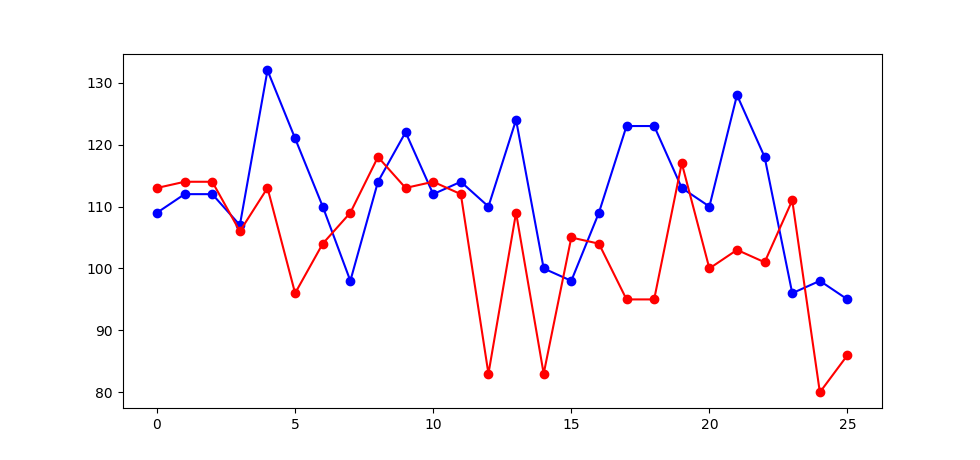

In [276]:
plt.figure()
plt.plot(pt_plus,'-bo')
plt.plot(pt_minus, '-ro')
plt.show()

In [20]:
from nba_util import _api_scrape, _get_json

# game stat per player
json_info = _get_json('boxscoreplayertrackv2', {'GameID':'0021800436'}, referer='scores')
player_df = _api_scrape(json_info, 0)
print(player_df)



[{u'UFGA': 2, u'DFGM': 1, u'DIST': 2.35, u'DFG_PCT': 1.0, u'MIN': u'27:49', u'TCHS': 20, u'UFGM': 1, u'DFGA': 1, u'DRBC': 3, u'TEAM_ID': 1610612737, u'UFG_PCT': 0.5, u'PLAYER_ID': 1628989, u'CFG_PCT': 0.5, u'COMMENT': u'', u'SAST': 0, u'PLAYER_NAME': u'Kevin Huerter', u'AST': 2, u'TEAM_ABBREVIATION': u'ATL', u'START_POSITION': u'F', u'SPD': 4.76, u'PASS': 14, u'GAME_ID': u'0021800436', u'RBC': 5, u'FG_PCT': 0.5, u'FTAST': 0, u'CFGM': 1, u'ORBC': 2, u'CFGA': 2, u'TEAM_CITY': u'Atlanta'}, {u'UFGA': 5, u'DFGM': 5, u'DIST': 2.6, u'DFG_PCT': 0.625, u'MIN': u'33:55', u'TCHS': 92, u'UFGM': 3, u'DFGA': 8, u'DRBC': 8, u'TEAM_ID': 1610612737, u'UFG_PCT': 0.6, u'PLAYER_ID': 1628381, u'CFG_PCT': 0.714, u'COMMENT': u'', u'SAST': 0, u'PLAYER_NAME': u'John Collins', u'AST': 2, u'TEAM_ABBREVIATION': u'ATL', u'START_POSITION': u'F', u'SPD': 4.39, u'PASS': 64, u'GAME_ID': u'0021800436', u'RBC': 17, u'FG_PCT': 0.684, u'FTAST': 0, u'CFGM': 10, u'ORBC': 9, u'CFGA': 14, u'TEAM_CITY': u'Atlanta'}, {u'UFGA': 

In [21]:
for player_stas in Atlanta()

{u'AST': 2,
 u'CFGA': 2,
 u'CFGM': 1,
 u'CFG_PCT': 0.5,
 u'COMMENT': u'',
 u'DFGA': 1,
 u'DFGM': 1,
 u'DFG_PCT': 1.0,
 u'DIST': 2.35,
 u'DRBC': 3,
 u'FG_PCT': 0.5,
 u'FTAST': 0,
 u'GAME_ID': u'0021800436',
 u'MIN': u'27:49',
 u'ORBC': 2,
 u'PASS': 14,
 u'PLAYER_ID': 1628989,
 u'PLAYER_NAME': u'Kevin Huerter',
 u'RBC': 5,
 u'SAST': 0,
 u'SPD': 4.76,
 u'START_POSITION': u'F',
 u'TCHS': 20,
 u'TEAM_ABBREVIATION': u'ATL',
 u'TEAM_CITY': u'Atlanta',
 u'TEAM_ID': 1610612737,
 u'UFGA': 2,
 u'UFGM': 1,
 u'UFG_PCT': 0.5}